## Codveda Internship – Level 2  
## Task 3: K-Means Clustering on Iris Dataset  
This notebook applies K-Means clustering, finds the optimal k using the elbow method, and visualizes the clusters.


In [2]:
#Loading the dataset
import pandas as pd

df = pd.read_csv("cleaned_iris.csv")

# Keep only numerical features for clustering
X = df.drop(columns=["species"])
X.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#Standarizing the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pd.DataFrame(X_scaled, columns=X.columns).head()


,sepal_length,sepal_width,petal_length,petal_width
0,-0.915509,1.019971,-1.357737,-1.3357
1,-1.157560,-0.128082,-1.357737,-1.3357
2,-1.399610,0.331139,-1.414778,-1.3357
3,-1.520635,0.101529,-1.300696,-1.3357
4,-1.036535,1.249582,-1.357737,-1.3357


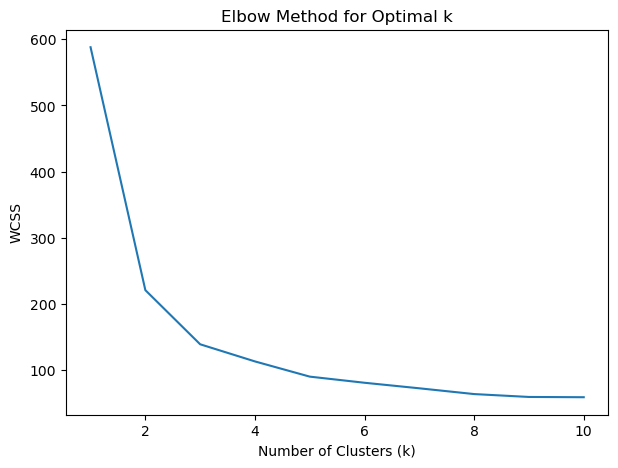

In [5]:
#Elbow method for finding optimal K

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


In [9]:
#Applying Kmeans with k=3 
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2


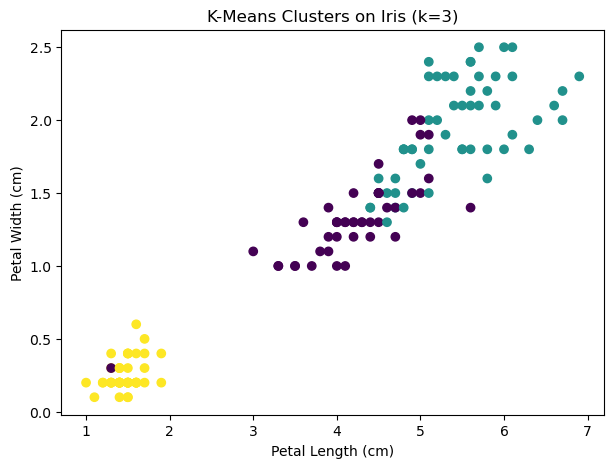

In [10]:
#Visualizing clusters
plt.figure(figsize=(7,5))
plt.scatter(df["petal_length"], df["petal_width"], c=df["cluster"])

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("K-Means Clusters on Iris (k=3)")
plt.show()


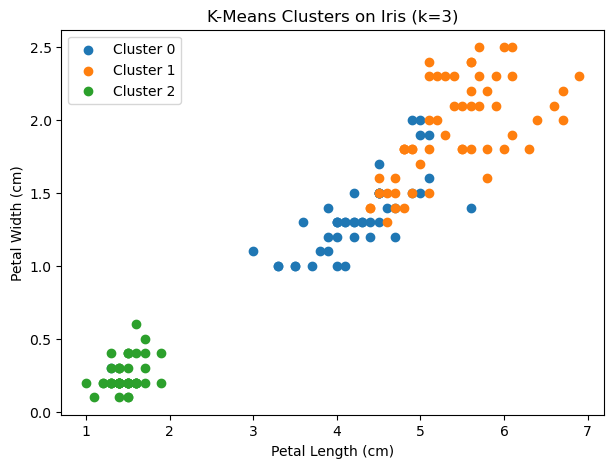

In [23]:
#Plot with legend
plt.figure(figsize=(7,5))

for cluster in sorted(df["cluster"].unique()):
    subset = df[df["cluster"] == cluster]
    plt.scatter(
        subset["petal_length"], 
        subset["petal_width"], 
        label=f"Cluster {cluster}"
    )

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("K-Means Clusters on Iris (k=3)")
plt.legend()
plt.show()



In [11]:
print(pd.crosstab(df["species"], df["cluster"]))


cluster      0   1   2
species               
setosa       1   0  47
versicolor  37  13   0
virginica    7  42   0


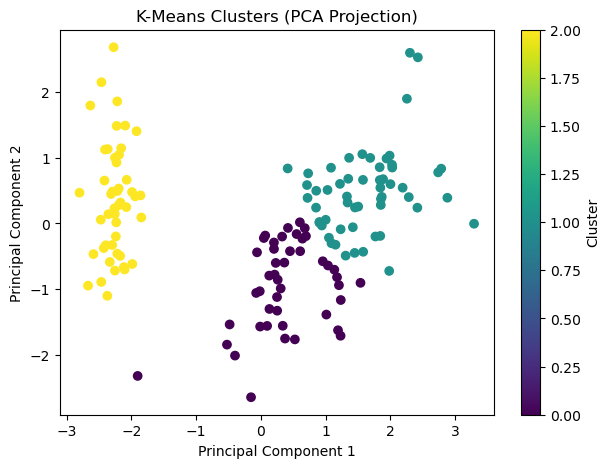

In [16]:
#PCA for reducing from 4d to 2d projection

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["cluster"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters (PCA Projection)")
plt.colorbar(label="Cluster")
plt.show()
